In [1]:
TFile *ipf = new TFile("root/gate5-isomer.root");
TH1F *h = (TH1F*)ipf->Get("gadd_0");
TCanvas *c1 = new TCanvas;

### 拟合函数定义

In [2]:
vector<double> e;            //e[0]为目标峰，其他为周围峰
double k,b;                  //线性本底参数
double fit_left,fit_right;   //联合拟合范围
double area_left,area_right; //峰面积计算范围

In [3]:
void area()
{
    c1->Clear();
    h->GetXaxis()->SetRangeUser(0,1500);        //返回全区间，在多次进行拟合时，必须要有这个操作，否则指定的拟合区间将存在问题

    //设置拟合函数：线性本底 + npeaks个高斯函数
    int npeaks = e.size();
    TString sf = "pol1(0)";
    for (int i=0; i<npeaks; i++)
        sf += Form("+gaus(%d)",3*i+2);
    TF1* f = new TF1("f", sf, fit_left, fit_right);
    f->FixParameter(0, b);                         //手动设置线性本底
    f->FixParameter(1, k);
    for (int i=0; i<npeaks; i++){
        f->SetParameter(3*i+2, 100);               //峰高
        f->SetParLimits(3*i+2, 1, 1e10);
        f->SetParameter(3*i+3, e[i]);              //峰中心
        f->SetParLimits(3*i+3, e[i]-1, e[i]+1);
        f->SetParameter(3*i+4, 1);                 //峰宽sigma
        f->SetParLimits(3*i+4, 0.5, 2.5);
    }
    
    TFitResultPtr fh = h->Fit(f, "QRS");
    f->SetLineColor(kRed);
    f->Draw("same");

    //单独提出线性本底
    TF1 *f1 = new TF1("f1", "pol1", 0, 1500);
    f1->SetParameter(0, b);
    f1->SetParameter(1, k);
    f1->SetLineColor(kBlue);
    f1->Draw("same");
    
    //提出联合拟合结果中的各个高斯峰
    TF1 *fg[npeaks];
    for (int i=0; i<npeaks; i++){
        fg[i] = new TF1(Form("fg%d",i), "gaus");
        fg[i]->SetParameter(0, f->GetParameter(3*i+2));
        fg[i]->SetParameter(1, f->GetParameter(3*i+3));
        fg[i]->SetParameter(2, f->GetParameter(3*i+4));
    }

    //计算峰面积
    int bin1 = h->FindBin(area_left);
    int bin2 = h->FindBin(area_right);
    double nall = h->Integral(bin1, bin2);                     //包含本底的总计数
    
    double x1 = h->GetBinLowEdge(bin1);                        //积分下界
    double x2 = h->GetBinLowEdge(bin2)+h->GetBinWidth(bin2);   //积分上界，注意使用了与TH1完全相等的积分范围
    double nbg = f1->Integral(x1, x2)/h->GetBinWidth(bin2);    //线性本底贡献
    for (int i=1; i<npeaks; i++)
        nbg += fg[i]->Integral(x1, x2)/h->GetBinWidth(bin2);   //其他高斯峰贡献；fg[0]是目标峰，不算进本底中

    //输出结果
    for (int i=0; i<npeaks; i++)
        cout<<i<<" peak="<<fg[i]->GetParameter(1)<<" height="<<fg[i]->GetParameter(0)
        <<" sigma="<<fg[i]->GetParameter(2)<<" contribution="<<fg[i]->Integral(x1, x2)/h->GetBinWidth(bin2)<<'\n';
    cout<<"chi2/ndf="<<fh->Chi2()/fh->Ndf()<<" count="<<nall-nbg<<" delta_count="<<sqrt(nall+nbg)<<endl;
}

## 逐峰拟合提取面积

In [4]:
%jsroot off

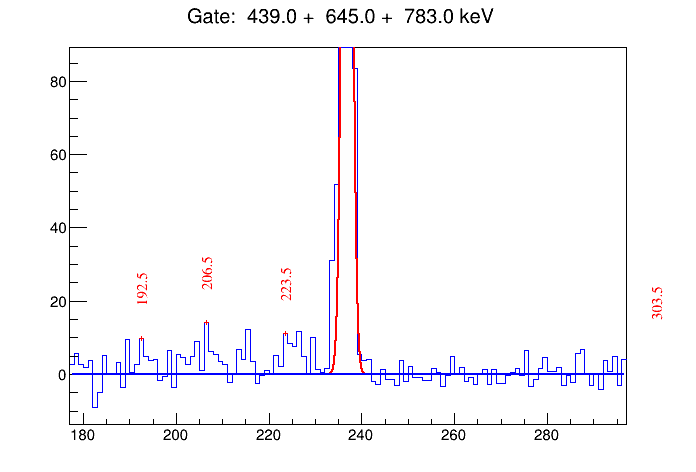

0 peak=236.937 height=367.567 sigma=0.926986 contribution=854.073
chi2/ndf=5.99508 count=928.941 delta_count=30.4785


In [13]:
e = vector<double> {237};
k = 0; b = 0;                      //线性本底参数
fit_left = e[0]-10; fit_right = e[0]+10;       //联合拟合范围
area_left = e[0]-4; area_right = e[0]+3;     //峰面积计算范围
area();
h->GetXaxis()->SetRangeUser(e[0]-60,e[0]+60); //设置显示区间
c1->Draw();

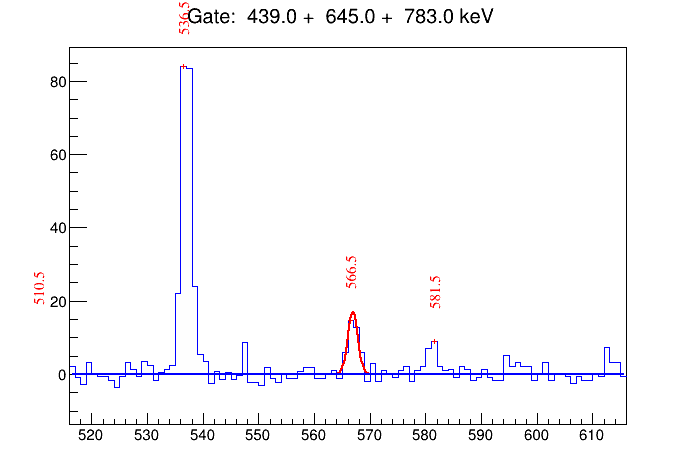

0 peak=566.963 height=16.9086 sigma=0.892627 contribution=36.88
chi2/ndf=1.34795 count=39.2791 delta_count=6.2673


In [18]:
e = vector<double> {566};
k = 0; b = 0;                      //线性本底参数
fit_left = e[0]-10; fit_right = e[0]+10;       //联合拟合范围
area_left = e[0]-1; area_right = e[0]+2;     //峰面积计算范围
area();
h->GetXaxis()->SetRangeUser(e[0]-50,e[0]+50); //设置显示区间
c1->Draw();

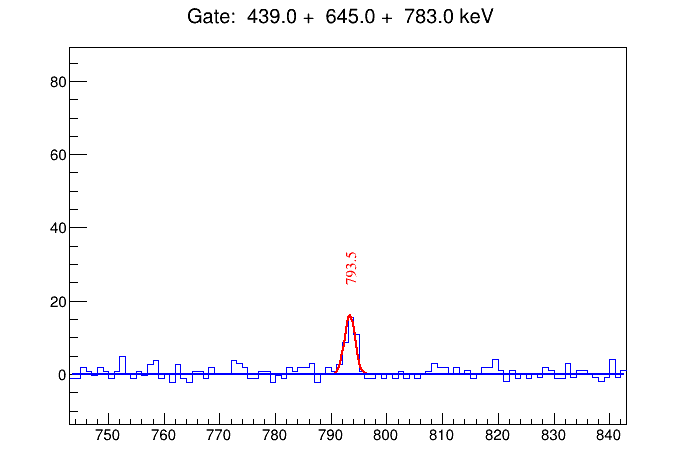

0 peak=793.412 height=16.0745 sigma=0.941466 contribution=37.6234
chi2/ndf=1.11039 count=39.006 delta_count=6.24548


In [19]:
e = vector<double> {793};
k = 0; b = 0;                      //线性本底参数
fit_left = e[0]-10; fit_right = e[0]+10;       //联合拟合范围
area_left = e[0]-2; area_right = e[0]+2;     //峰面积计算范围
area();
h->GetXaxis()->SetRangeUser(e[0]-50,e[0]+50); //设置显示区间
c1->Draw();

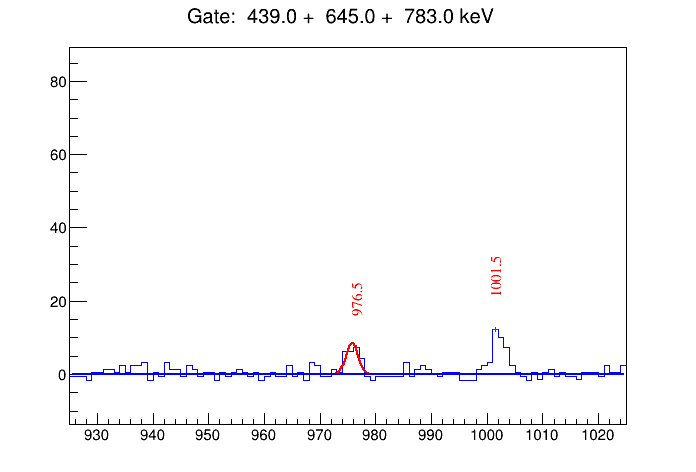

0 peak=975.841 height=8.3968 sigma=1.04795 contribution=21.5485
chi2/ndf=1.13791 count=24.7718 delta_count=4.97713


In [20]:
e = vector<double> {975};
k = 0; b = 0;                      //线性本底参数
fit_left = e[0]-10; fit_right = e[0]+10;       //联合拟合范围
area_left = e[0]-2; area_right = e[0]+2;     //峰面积计算范围
area();
h->GetXaxis()->SetRangeUser(e[0]-50,e[0]+50); //设置显示区间
c1->Draw();

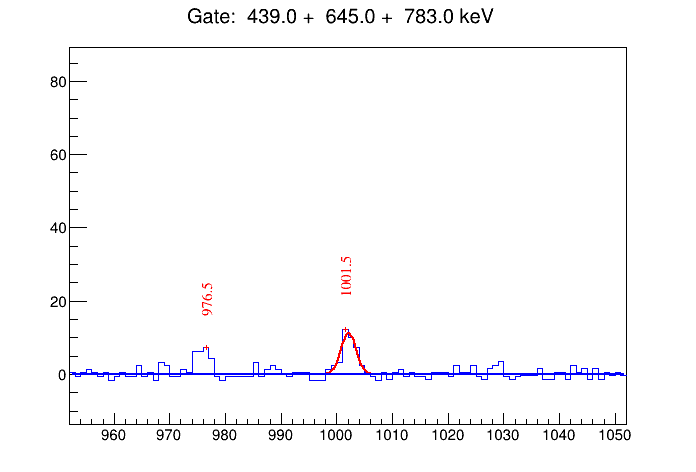

0 peak=1002.2 height=11.2301 sigma=1.3221 contribution=34.7953
chi2/ndf=0.87296 count=35.6128 delta_count=5.96764


In [23]:
e = vector<double> {1002};
k = 0; b = 0;                      //线性本底参数
fit_left = e[0]-10; fit_right = e[0]+10;       //联合拟合范围
area_left = e[0]-2; area_right = e[0]+2;     //峰面积计算范围
area();
h->GetXaxis()->SetRangeUser(e[0]-50,e[0]+50); //设置显示区间
c1->Draw();